In [16]:
import numpy as np

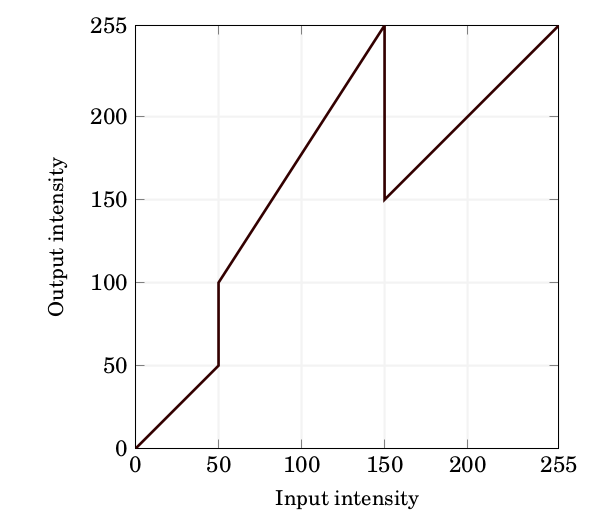

In [17]:
def intensity_transformation_pixel(pix_val:int)->int:
    if 50 <= pix_val and pix_val <= 150:
        return 1.55*pix_val + 22.5
    else:
        return pix_val
    
def intensity_transformation_img(img:np.ndarray)->np.ndarray:
    # for plotting uint8 and float32 images are supported
    new_img = np.zeros(img.shape, dtype=np.uint8)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            pixel = img[i][j]
            
            new_img[i][j] = intensity_transformation_pixel(pixel)
    
    
    return np.array(new_img, dtype=np.uint8)


In [18]:
import numpy as np
import cv2 

# since the image in the assignment is grayscale
img = cv2.imread("a1images/emma.jpg", cv2.IMREAD_GRAYSCALE)

# create a new np array with the shape of the image
new_img = intensity_transformation_img(img)

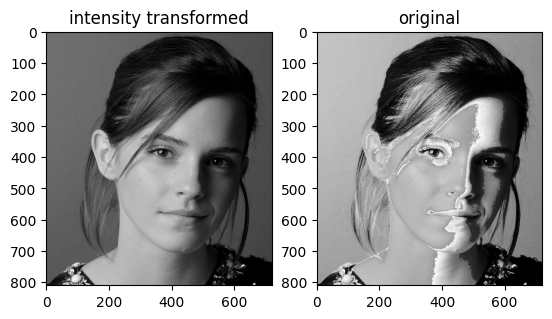

In [19]:


# show image using matplotlib 
import matplotlib.pyplot as plt

# show original image and transformed image side by side
plt.subplot(1, 2, 2)
plt.title("original")
plt.imshow(new_img, cmap='gray')

plt.subplot(1, 2, 1)
plt.title("intensity transformed")
plt.imshow(img, cmap='gray')

Q2.

(217, 181)

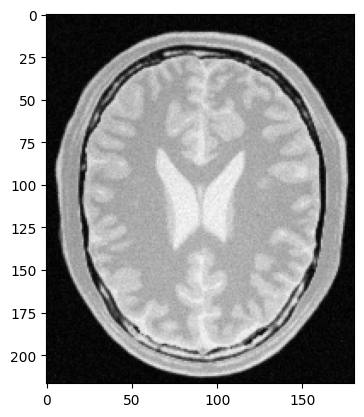

In [20]:
brain_proton_img = cv2.imread("a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(brain_proton_img, cmap='gray')
brain_proton_img.shape

In [21]:
brain_proton_img.dtype

dtype('uint8')

In [22]:
intensity_transformed_brain_proton_img = intensity_transformation_img(brain_proton_img)
intensity_transformed_brain_proton_img.shape


(217, 181)

In [23]:
intensity_transformed_brain_proton_img[2][3]

5

In [24]:
intensity_transformed_brain_proton_img.dtype

dtype('uint8')

TypeError: Image data of dtype object cannot be converted to float

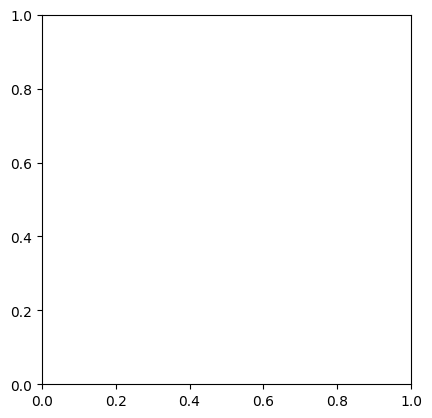

In [25]:
plt.imshow(intensity_transformation_img)

In [26]:
# Q3 

bgr_img = cv2.imread("a1images/highlights_and_shadows.jpg")

L*: Lightness
a*: Red/Green Value
b*: Blue/Yellow Value

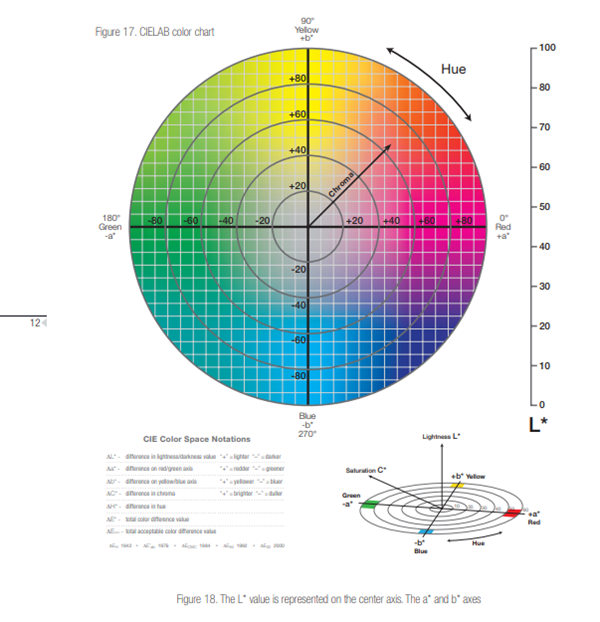

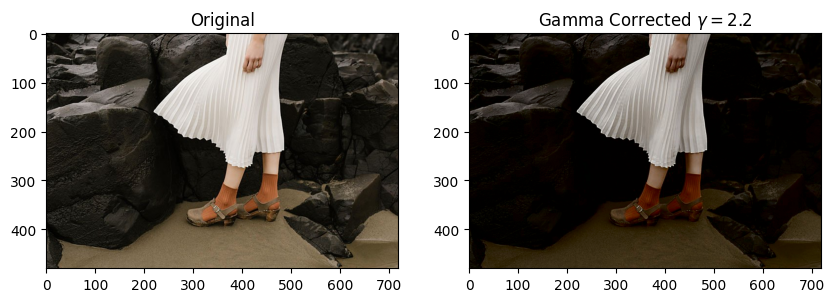

In [27]:
import cv2
import numpy as np

# Convert RGB image to LAB color space
lab_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2LAB)

# Split into L, A, and B channels
L, A, B = cv2.split(lab_img)

# Normalize L channel to [0, 1]
L = L / 255.0

# Apply gamma correction with gamma = 0.8
gamma = 2.2
L_gamma_corrected = np.power(L, gamma)

# Rescale to [0, 255] and convert to uint8
L_gamma_corrected = np.uint8(L_gamma_corrected * 255)

# Merge the corrected L channel with the original A and B channels
lab_gamma_corrected = cv2.merge((L_gamma_corrected, A, B))

# Convert back to RGB color space
gamma_corrected_img = cv2.cvtColor(lab_gamma_corrected, cv2.COLOR_LAB2BGR)

# Display original and the gamma corrected images side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot on the first subplot
axs[0].set_title("Original")
axs[0].imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))

# Plot on the second subplot
axs[1].set_title("Gamma Corrected $\gamma = 2.2$")
axs[1].imshow(cv2.cvtColor(gamma_corrected_img, cv2.COLOR_BGR2RGB))

# Show the figure
plt.show()


In [31]:
bgr_img[:, :, 0].shape

(480, 720)

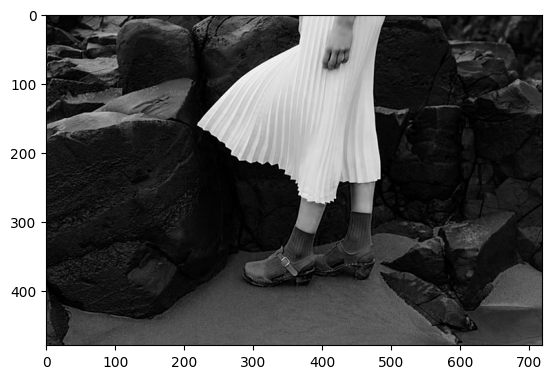

In [33]:
plt.title("Original image : blue channel")
plt.imshow(bgr_img[:, :, 0], cmap="gray")

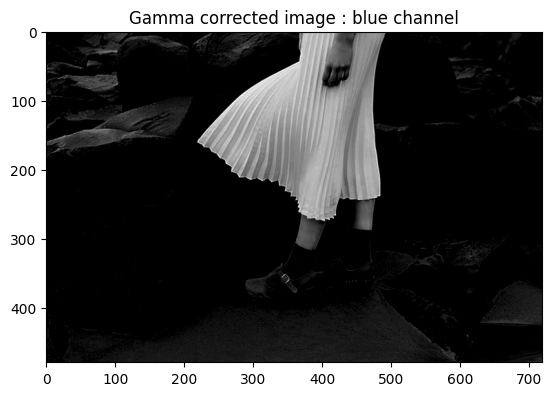

In [34]:
plt.title("Gamma corrected image : blue channel")
plt.imshow(gamma_corrected_img[:,:,0], cmap="gray")

In [41]:
bgr_img[:,:,0].flatten().shape

(345600,)

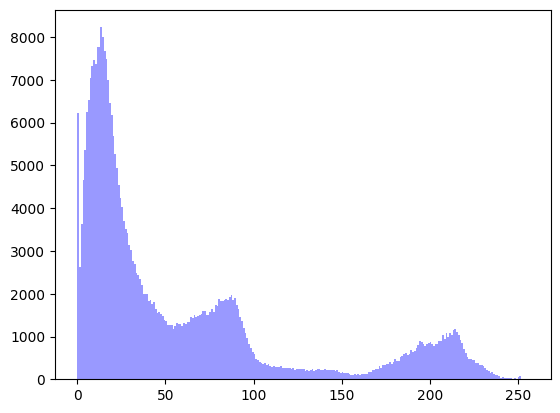

In [50]:
plt.hist(bgr_img[:,:,0].flatten(), bins=256, range=[0, 256], color='b',alpha=0.4);

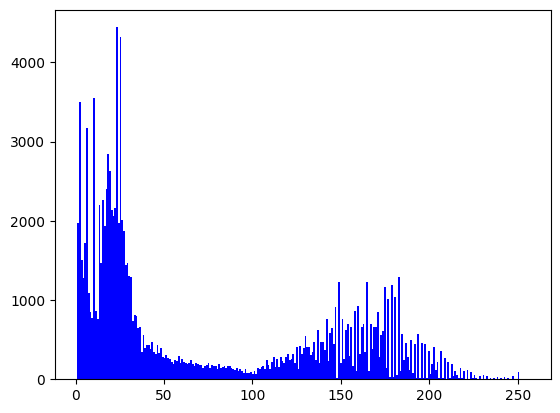

In [49]:
plt.hist(gamma_corrected_img[:,:,0].flatten(), bins=256, range=[1, 256], color='b');
# number of zeros in gamma corrected (gamma = 2.2) is really high

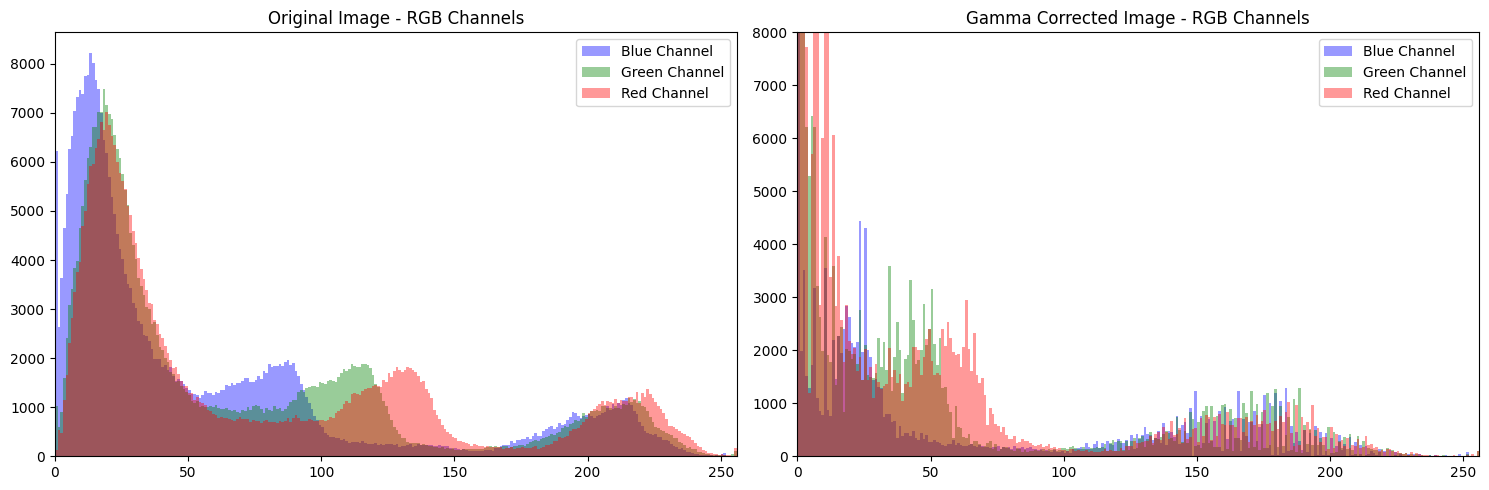

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming bgr_img is the original image and gamma_corrected_img is the gamma-corrected image

# Create subplots for original and gamma corrected image histograms
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Original image histograms (Red, Green, Blue in the same plot)
axs[0].set_title("Original Image - RGB Channels")
axs[0].hist(bgr_img[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
axs[0].hist(bgr_img[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
axs[0].hist(bgr_img[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
axs[0].set_xlim([0, 256])
axs[0].legend()

# Gamma corrected image histograms (Red, Green, Blue in the same plot)
axs[1].set_title("Gamma Corrected Image - RGB Channels")
axs[1].hist(gamma_corrected_img[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
axs[1].hist(gamma_corrected_img[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
axs[1].hist(gamma_corrected_img[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
axs[1].set_xlim([0, 256])
axs[1].set_ylim([0, 8000])  # Set a y-axis limit to reduce dominance of zeros
axs[1].legend()

# Show the figure
plt.tight_layout()
plt.show()


In [ ]:
# TODO: Correct gamma value, gamma low value should darken the image, mine happens otherway round

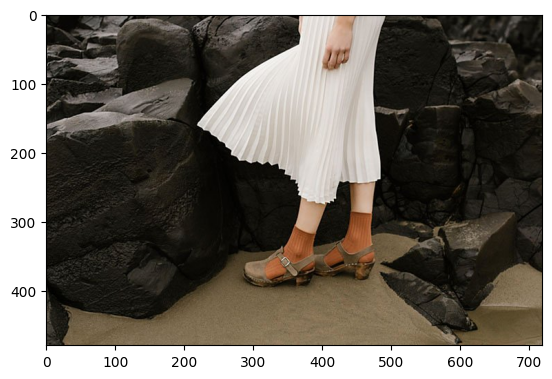

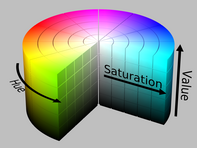

 when discussing BGR and RGB in OpenCV:
They refer to the order of color channels (BGR being the default in OpenCV).
They do not specifically refer to color spaces like sRGB or Adobe RGB.
The actual color space used (sRGB or Adobe RGB) depends on how images are processed or saved outside of OpenCV's default handling. For example, images read in BGR can be converted to RGB for use with other libraries that expect that format.
Thus, while OpenCV operates with BGR by default, it does not inherently define whether the image is in sRGB or Adobe RGB; that distinction comes from how the images are created or intended to be used.

In [59]:
# Q4

spiderman_img = cv2.imread("a1images/spider.png")

# convert the image into HSV color space
hsv_spiderman_img = cv2.cvtColor(spiderman_img, cv2.COLOR_BGR2HSV)
hsv_spiderman_img.shape

(438, 780, 3)

In [65]:
import matplotlib

matplotlib.colors.Colormap

matplotlib.colors.Colormap

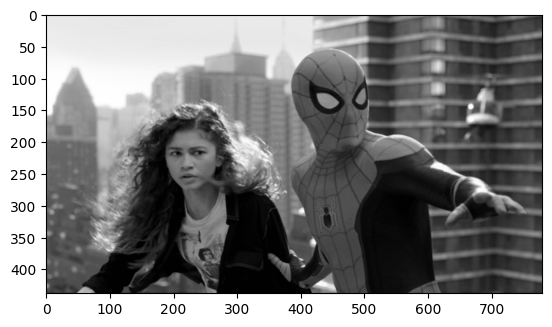

In [70]:
plt.subplots((1,3))

fig, ax = 
plt.title("Hue channel")
plt.imshow(hsv_spiderman_img[:,:,0], cmap="gray")